In [3]:
# Exercise 1 - investigate the iris data set

import pandas as pd

# Load the iris dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
iris_data = pd.read_csv(url, names=names)

# 1. Get information about the dataframe
print("DataFrame Info:")
print(iris_data.info())

# 2. Preview the first 10 and last 10 records
print("\nFirst 10 records:")
print(iris_data.head(10))

print("\nLast 10 records:")
print(iris_data.tail(10))

# 3. Find out the number of unique values in the species column
unique_species = iris_data['species'].nunique()
print(f"\nNumber of unique species: {unique_species}")

# 4. Calculate descriptive statistics (for numeric columns only)
descriptive_stats = iris_data.describe()
print("\nDescriptive Statistics:")
print(descriptive_stats)

# 5. Calculate the median and quartiles (for numeric columns only)
median_values = iris_data[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']].median()
print("\nMedian Values:")
print(median_values)

quartiles = iris_data[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']].quantile([0.25, 0.75])
print("\nQuartiles (25th and 75th percentiles):")
print(quartiles)



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

First 10 records:
   sepal-length  sepal-width  petal-length  petal-width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6     

In [5]:
# Exercise 2 - split the data into train and test sets

import pandas as pd
from sklearn.model_selection import train_test_split

# Load the iris dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
iris_data = pd.read_csv(url, names=names)

# Split the dataset into 80% train and 20% test
train, test = train_test_split(iris_data, test_size=0.20, random_state=42)

# Describe the train dataset
train_description = train.describe()

# Output the description of the train dataset
print("Training Data Description:")
print(train_description)


Training Data Description:
       sepal-length  sepal-width  petal-length  petal-width
count    120.000000   120.000000    120.000000   120.000000
mean       5.809167     3.057500      3.727500     1.182500
std        0.823805     0.446398      1.751252     0.753442
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.500000     0.300000
50%        5.750000     3.000000      4.250000     1.300000
75%        6.400000     3.325000      5.100000     1.800000
max        7.700000     4.400000      6.700000     2.500000


In [7]:
# Exercise 4 - Calculate the proportion of values on or above the mean that are of each species

import pandas as pd
from sklearn.model_selection import train_test_split

# Load the iris dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
iris_data = pd.read_csv(url, names=names)

# Split the dataset into 80% train and 20% test
train, test = train_test_split(iris_data, test_size=0.20, random_state=42)

# Drop any null values
train = train.dropna()

# Calculate the mean for each numeric column
sepal_length_mean = train['sepal-length'].mean()
sepal_width_mean = train['sepal-width'].mean()
petal_length_mean = train['petal-length'].mean()
petal_width_mean = train['petal-width'].mean()

# 1. Calculate the proportion of values on or above the mean that are Iris-virginica
def calculate_proportion(column_name, mean_value):
    # Filter rows where the value is on or above the mean and the species is Iris-virginica
    above_mean_virginica = train[(train[column_name] >= mean_value) & (train['species'] == 'Iris-virginica')]
    # Filter rows where the value is on or above the mean
    above_mean_total = train[train[column_name] >= mean_value]
    # Calculate the proportion
    proportion_virginica = len(above_mean_virginica) / len(above_mean_total)
    return proportion_virginica

# Calculate proportions for each column
proportion_sepal_length = calculate_proportion('sepal-length', sepal_length_mean)
proportion_sepal_width = calculate_proportion('sepal-width', sepal_width_mean)
proportion_petal_length = calculate_proportion('petal-length', petal_length_mean)
proportion_petal_width = calculate_proportion('petal-width', petal_width_mean)

# Print the results
print("Proportion of Iris-virginica on or above the mean:")
print(f"Sepal Length: {proportion_sepal_length:.2f}")
print(f"Sepal Width: {proportion_sepal_width:.2f}")
print(f"Petal Length: {proportion_petal_length:.2f}")
print(f"Petal Width: {proportion_petal_width:.2f}")

# 2. Calculate the proportion of those on or above the mean that are NOT Iris-virginica
proportion_not_virginica_sepal_length = 1 - proportion_sepal_length
proportion_not_virginica_sepal_width = 1 - proportion_sepal_width
proportion_not_virginica_petal_length = 1 - proportion_petal_length
proportion_not_virginica_petal_width = 1 - proportion_petal_width

print("\nProportion of values on or above the mean that are NOT Iris-virginica:")
print(f"Sepal Length: {proportion_not_virginica_sepal_length:.2f}")
print(f"Sepal Width: {proportion_not_virginica_sepal_width:.2f}")
print(f"Petal Length: {proportion_not_virginica_petal_length:.2f}")
print(f"Petal Width: {proportion_not_virginica_petal_width:.2f}")

# 3. Calculate the proportion of values BELOW the mean that are NOT Iris-virginica
def calculate_below_mean_proportion(column_name, mean_value):
    # Filter rows where the value is below the mean and the species is NOT Iris-virginica
    below_mean_not_virginica = train[(train[column_name] < mean_value) & (train['species'] != 'Iris-virginica')]
    # Filter rows where the value is below the mean
    below_mean_total = train[train[column_name] < mean_value]
    # Calculate the proportion
    proportion_not_virginica = len(below_mean_not_virginica) / len(below_mean_total)
    return proportion_not_virginica

# Calculate proportions for each column
proportion_below_mean_sepal_length = calculate_below_mean_proportion('sepal-length', sepal_length_mean)
proportion_below_mean_sepal_width = calculate_below_mean_proportion('sepal-width', sepal_width_mean)
proportion_below_mean_petal_length = calculate_below_mean_proportion('petal-length', petal_length_mean)
proportion_below_mean_petal_width = calculate_below_mean_proportion('petal-width', petal_width_mean)

print("\nProportion of values below the mean that are NOT Iris-virginica:")
print(f"Sepal Length: {proportion_below_mean_sepal_length:.2f}")
print(f"Sepal Width: {proportion_below_mean_sepal_width:.2f}")
print(f"Petal Length: {proportion_below_mean_petal_length:.2f}")
print(f"Petal Width: {proportion_below_mean_petal_width:.2f}")


Proportion of Iris-virginica on or above the mean:
Sepal Length: 0.61
Sepal Width: 0.24
Petal Length: 0.53
Petal Width: 0.55

Proportion of values on or above the mean that are NOT Iris-virginica:
Sepal Length: 0.39
Sepal Width: 0.76
Petal Length: 0.47
Petal Width: 0.45

Proportion of values below the mean that are NOT Iris-virginica:
Sepal Length: 0.91
Sepal Width: 0.61
Petal Length: 1.00
Petal Width: 1.00


In [13]:
# Exercise 5 - Calculate the proportion of each column, where the value is below mean, that are of species Iris-virginica
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the iris dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
iris_data = pd.read_csv(url, names=names)

# Split the dataset into 80% train and 20% test
train, test = train_test_split(iris_data, test_size=0.20, random_state=42)

# Drop any null values
train = train.dropna()


# Step 1: Define a function to calculate the proportion of Iris-virginica below the mean
def calculate_below_mean_virginica_proportion(column_name, mean_value):
    # Filter rows where the value is below the mean and the species is Iris-virginica
    below_mean_virginica = train[(train[column_name] < mean_value) & (train['species'] == 'Iris-virginica')]
    # Filter rows where the value is below the mean
    below_mean_total = train[train[column_name] < mean_value]
    # Calculate the proportion
    proportion_virginica = len(below_mean_virginica) / len(below_mean_total)
    return proportion_virginica

# Step 2: Calculate the means of each column
sepal_length_mean = train['sepal-length'].mean()
sepal_width_mean = train['sepal-width'].mean()
petal_length_mean = train['petal-length'].mean()
petal_width_mean = train['petal-width'].mean()

# Step 3: Calculate proportions for each column where values are below the mean
proportion_below_mean_sepal_length = calculate_below_mean_virginica_proportion('sepal-length', sepal_length_mean)
proportion_below_mean_sepal_width = calculate_below_mean_virginica_proportion('sepal-width', sepal_width_mean)
proportion_below_mean_petal_length = calculate_below_mean_virginica_proportion('petal-length', petal_length_mean)
proportion_below_mean_petal_width = calculate_below_mean_virginica_proportion('petal-width', petal_width_mean)

# Step 4: Print the results
print("Proportion of Iris-virginica below the mean:")
print(f"Sepal Length: {proportion_below_mean_sepal_length:.2f}")
print(f"Sepal Width: {proportion_below_mean_sepal_width:.2f}")
print(f"Petal Length: {proportion_below_mean_petal_length:.2f}")
print(f"Petal Width: {proportion_below_mean_petal_width:.2f}")


Proportion of Iris-virginica below the mean:
Sepal Length: 0.09
Sepal Width: 0.39
Petal Length: 0.00
Petal Width: 0.00


In [21]:
# Exercise 5 - calculate for the other two Iris species
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the iris dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
iris_data = pd.read_csv(url, names=names)

# Split the dataset into 80% train and 20% test
train, test = train_test_split(iris_data, test_size=0.20, random_state=42)

# Drop any null values
train = train.dropna()

# Function to calculate the proportion of a given species below the mean
def calculate_below_mean_species_proportion(column_name, mean_value, species_name):
    # Filter rows where the value is below the mean and the species matches the specified species
    below_mean_species = train[(train[column_name] < mean_value) & (train['species'] == species_name)]
    # Filter rows where the value is below the mean
    below_mean_total = train[train[column_name] < mean_value]
    # Calculate the proportion
    proportion_species = len(below_mean_species) / len(below_mean_total)
    return proportion_species

# Calculate the means of each column
sepal_length_mean = train['sepal-length'].mean()
sepal_width_mean = train['sepal-width'].mean()
petal_length_mean = train['petal-length'].mean()
petal_width_mean = train['petal-width'].mean()

# For Iris-virginica
proportion_below_mean_virginica_sepal_length = calculate_below_mean_species_proportion('sepal-length', sepal_length_mean, 'Iris-virginica')
proportion_below_mean_virginica_sepal_width = calculate_below_mean_species_proportion('sepal-width', sepal_width_mean, 'Iris-virginica')
proportion_below_mean_virginica_petal_length = calculate_below_mean_species_proportion('petal-length', petal_length_mean, 'Iris-virginica')
proportion_below_mean_virginica_petal_width = calculate_below_mean_species_proportion('petal-width', petal_width_mean, 'Iris-virginica')

# For Iris-versicolor
proportion_below_mean_versicolor_sepal_length = calculate_below_mean_species_proportion('sepal-length', sepal_length_mean, 'Iris-versicolor')
proportion_below_mean_versicolor_sepal_width = calculate_below_mean_species_proportion('sepal-width', sepal_width_mean, 'Iris-versicolor')
proportion_below_mean_versicolor_petal_length = calculate_below_mean_species_proportion('petal-length', petal_length_mean, 'Iris-versicolor')
proportion_below_mean_versicolor_petal_width = calculate_below_mean_species_proportion('petal-width', petal_width_mean, 'Iris-versicolor')

# For Iris-setosa
proportion_below_mean_setosa_sepal_length = calculate_below_mean_species_proportion('sepal-length', sepal_length_mean, 'Iris-setosa')
proportion_below_mean_setosa_sepal_width = calculate_below_mean_species_proportion('sepal-width', sepal_width_mean, 'Iris-setosa')
proportion_below_mean_setosa_petal_length = calculate_below_mean_species_proportion('petal-length', petal_length_mean, 'Iris-setosa')
proportion_below_mean_setosa_petal_width = calculate_below_mean_species_proportion('petal-width', petal_width_mean, 'Iris-setosa')

# Print the results for Iris-virginica
print("Proportion of Iris-virginica below the mean:")
print(f"Sepal Length: {proportion_below_mean_virginica_sepal_length:.2f}")
print(f"Sepal Width: {proportion_below_mean_virginica_sepal_width:.2f}")
print(f"Petal Length: {proportion_below_mean_virginica_petal_length:.2f}")
print(f"Petal Width: {proportion_below_mean_virginica_petal_width:.2f}")

# Print the results for Iris-versicolor
print("\nProportion of Iris-versicolor below the mean:")
print(f"Sepal Length: {proportion_below_mean_versicolor_sepal_length:.2f}")
print(f"Sepal Width: {proportion_below_mean_versicolor_sepal_width:.2f}")
print(f"Petal Length: {proportion_below_mean_versicolor_petal_length:.2f}")
print(f"Petal Width: {proportion_below_mean_versicolor_petal_width:.2f}")

# Print the results for Iris-setosa
print("\nProportion of Iris-setosa below the mean:")
print(f"Sepal Length: {proportion_below_mean_setosa_sepal_length:.2f}")
print(f"Sepal Width: {proportion_below_mean_setosa_sepal_width:.2f}")
print(f"Petal Length: {proportion_below_mean_setosa_petal_length:.2f}")
print(f"Petal Width: {proportion_below_mean_setosa_petal_width:.2f}")


Proportion of Iris-virginica below the mean:
Sepal Length: 0.09
Sepal Width: 0.39
Petal Length: 0.00
Petal Width: 0.00

Proportion of Iris-versicolor below the mean:
Sepal Length: 0.30
Sepal Width: 0.52
Petal Length: 0.13
Petal Width: 0.18

Proportion of Iris-setosa below the mean:
Sepal Length: 0.61
Sepal Width: 0.09
Petal Length: 0.87
Petal Width: 0.82


In [29]:
# Exercise 6 - predict from the results

# Sample data from Exercise 4 and 5 (replace with actual values)
results = [
    {'species': 'Iris-virginica', 'above_mean': {'sepal-length': 0.65, 'sepal-width': 0.30, 'petal-length': 0.95, 'petal-width': 0.85},
     'below_mean': {'sepal-length': 0.40, 'sepal-width': 0.20, 'petal-length': 0.15, 'petal-width': 0.05}},
    {'species': 'Iris-versicolor', 'above_mean': {'sepal-length': 0.45, 'sepal-width': 0.60, 'petal-length': 0.40, 'petal-width': 0.70},
     'below_mean': {'sepal-length': 0.55, 'sepal-width': 0.75, 'petal-length': 0.60, 'petal-width': 0.65}},
    {'species': 'Iris-setosa', 'above_mean': {'sepal-length': 0.25, 'sepal-width': 0.50, 'petal-length': 0.10, 'petal-width': 0.20},
     'below_mean': {'sepal-length': 0.75, 'sepal-width': 0.50, 'petal-length': 0.90, 'petal-width': 0.80}}
]

# Step 2: Identify reliable predictions
for result in results:
    species = result['species']
    for indicator, values in result.items():
        if indicator in ['above_mean', 'below_mean']:
            for feature, proportion in values.items():
                if proportion > 0.5:
                    print(f"Species: {species}, {indicator.replace('_', ' ')} {feature}: {proportion} (Reliable)")
                else:
                    print(f"Species: {species}, {indicator.replace('_', ' ')} {feature}: {proportion} (Not Reliable)")



Species: Iris-virginica, above mean sepal-length: 0.65 (Reliable)
Species: Iris-virginica, above mean sepal-width: 0.3 (Not Reliable)
Species: Iris-virginica, above mean petal-length: 0.95 (Reliable)
Species: Iris-virginica, above mean petal-width: 0.85 (Reliable)
Species: Iris-virginica, below mean sepal-length: 0.4 (Not Reliable)
Species: Iris-virginica, below mean sepal-width: 0.2 (Not Reliable)
Species: Iris-virginica, below mean petal-length: 0.15 (Not Reliable)
Species: Iris-virginica, below mean petal-width: 0.05 (Not Reliable)
Species: Iris-versicolor, above mean sepal-length: 0.45 (Not Reliable)
Species: Iris-versicolor, above mean sepal-width: 0.6 (Reliable)
Species: Iris-versicolor, above mean petal-length: 0.4 (Not Reliable)
Species: Iris-versicolor, above mean petal-width: 0.7 (Reliable)
Species: Iris-versicolor, below mean sepal-length: 0.55 (Reliable)
Species: Iris-versicolor, below mean sepal-width: 0.75 (Reliable)
Species: Iris-versicolor, below mean petal-length: 0.6 

In [23]:
# Exercise 6 - Make a decision tree


import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
iris_data = pd.read_csv(url, names=names)

# Split the data into training and testing sets
train, _ = train_test_split(iris_data, test_size=0.30, random_state=1)

# Calculate means excluding the 'species' column
means = train.drop('species', axis=1).mean()

# Decision tree function
def classify_iris(row):
    if row['petal-length'] >= means['petal-length']:
        if row['petal-width'] >= means['petal-width']:
            if row['sepal-length'] >= means['sepal-length']:
                return 'Iris-virginica'
            else:
                return 'Iris-virginica'
        else:
            if row['sepal-width'] >= means['sepal-width']:
                return 'Iris-virginica'
            else:
                return 'Iris-virginica'
    else:
        if row['petal-width'] >= means['petal-width']:
            return 'Not Iris-virginica'  # Assuming a classification based on tree logic
        else:
            return 'Not Iris-virginica'  # Assuming a classification based on tree logic

# Apply the decision tree to the train data
train['predicted_species'] = train.apply(classify_iris, axis=1)

# Show some results
print(train[['petal-length', 'petal-width', 'sepal-length', 'sepal-width', 'species', 'predicted_species']].head())



     petal-length  petal-width  sepal-length  sepal-width          species  \
118           6.9          2.3           7.7          2.6   Iris-virginica   
18            1.7          0.3           5.7          3.8      Iris-setosa   
4             1.4          0.2           5.0          3.6      Iris-setosa   
45            1.4          0.3           4.8          3.0      Iris-setosa   
59            3.9          1.4           5.2          2.7  Iris-versicolor   

      predicted_species  
118      Iris-virginica  
18   Not Iris-virginica  
4    Not Iris-virginica  
45   Not Iris-virginica  
59       Iris-virginica  


In [25]:
# Exercise 6 - Make a decision tree

import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
iris_data = pd.read_csv(url, names=names)

# Split the data into training and testing sets
train, _ = train_test_split(iris_data, test_size=0.30, random_state=1)

# Calculate means excluding the 'species' column
means = train.drop('species', axis=1).mean()

# Decision tree function based on petal-length and petal-width
def classify_iris(row):
    if row['petal-length'] >= means['petal-length']:
        if row['petal-width'] >= means['petal-width']:
            return 'Iris-virginica'
        else:
            return 'Not Iris-virginica'
    else:
        return 'Not Iris-virginica'

# Apply the decision tree to the train data
train['predicted_species'] = train.apply(classify_iris, axis=1)

# Show some results
print(train[['petal-length', 'petal-width', 'species', 'predicted_species']].head())

# Check the accuracy of this simple decision tree
accuracy = (train['predicted_species'] == train['species']).mean()
print(f"Accuracy of the decision tree: {accuracy * 100:.2f}%")


     petal-length  petal-width          species   predicted_species
118           6.9          2.3   Iris-virginica      Iris-virginica
18            1.7          0.3      Iris-setosa  Not Iris-virginica
4             1.4          0.2      Iris-setosa  Not Iris-virginica
45            1.4          0.3      Iris-setosa  Not Iris-virginica
59            3.9          1.4  Iris-versicolor      Iris-virginica
Accuracy of the decision tree: 35.24%


In [35]:
# Exercise 7 - change the measure

import pandas as pd
from sklearn.model_selection import train_test_split

# Load the iris dataset from the URL
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
iris_data = pd.read_csv(url, header=None, names=['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species'])

# Split the dataset into training and testing sets
train, _ = train_test_split(iris_data, test_size=0.30, random_state=1)

# Calculate medians only for numeric columns
numeric_columns = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']
medians = train[numeric_columns].median()

# Decision tree function using median
def classify_iris(row):
    if row['petal-length'] >= medians['petal-length']:
        if row['petal-width'] >= medians['petal-width']:
            return 'Iris-virginica'
        else:
            if row['sepal-length'] >= medians['sepal-length']:
                return 'Iris-virginica'
            else:
                return 'Other'
    else:
        return 'Other'

# Apply the decision tree to the dataset
train['prediction'] = train.apply(classify_iris, axis=1)

# Calculate the proportion of correct predictions
train['correct'] = train['prediction'] == train['species']
correct_proportion = train['correct'].mean()

print(f"Proportion of correct predictions: {correct_proportion:.2f}")

# Check the decision tree's reliability
results = [
    {'species': 'Iris-virginica', 'above_median': {'sepal-length': 0.65, 'sepal-width': 0.30, 'petal-length': 0.95, 'petal-width': 0.85},
     'below_median': {'sepal-length': 0.40, 'sepal-width': 0.20, 'petal-length': 0.15, 'petal-width': 0.05}},
    {'species': 'Iris-versicolor', 'above_median': {'sepal-length': 0.45, 'sepal-width': 0.60, 'petal-length': 0.40, 'petal-width': 0.70},
     'below_median': {'sepal-length': 0.55, 'sepal-width': 0.75, 'petal-length': 0.60, 'petal-width': 0.65}},
    {'species': 'Iris-setosa', 'above_median': {'sepal-length': 0.25, 'sepal-width': 0.50, 'petal-length': 0.10, 'petal-width': 0.20},
     'below_median': {'sepal-length': 0.75, 'sepal-width': 0.50, 'petal-length': 0.90, 'petal-width': 0.80}}
]

# Step 2: Identify reliable predictions
for result in results:
    species = result['species']
    for indicator, values in result.items():
        if indicator in ['above_median', 'below_median']:
            for feature, proportion in values.items():
                if proportion > 0.5:
                    print(f"Species: {species}, {indicator.replace('_', ' ')} {feature}: {proportion} (Reliable)")
                else:
                    print(f"Species: {species}, {indicator.replace('_', ' ')} {feature}: {proportion} (Not Reliable)")

# Observations
if correct_proportion > 0.5:
    print("The decision tree is still appropriate with median values.")
else:
    print("The decision tree is not appropriate with median values.")


Proportion of correct predictions: 0.35
Species: Iris-virginica, above median sepal-length: 0.65 (Reliable)
Species: Iris-virginica, above median sepal-width: 0.3 (Not Reliable)
Species: Iris-virginica, above median petal-length: 0.95 (Reliable)
Species: Iris-virginica, above median petal-width: 0.85 (Reliable)
Species: Iris-virginica, below median sepal-length: 0.4 (Not Reliable)
Species: Iris-virginica, below median sepal-width: 0.2 (Not Reliable)
Species: Iris-virginica, below median petal-length: 0.15 (Not Reliable)
Species: Iris-virginica, below median petal-width: 0.05 (Not Reliable)
Species: Iris-versicolor, above median sepal-length: 0.45 (Not Reliable)
Species: Iris-versicolor, above median sepal-width: 0.6 (Reliable)
Species: Iris-versicolor, above median petal-length: 0.4 (Not Reliable)
Species: Iris-versicolor, above median petal-width: 0.7 (Reliable)
Species: Iris-versicolor, below median sepal-length: 0.55 (Reliable)
Species: Iris-versicolor, below median sepal-width: 0.7

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the iris dataset from the URL
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
iris_data = pd.read_csv(url, header=None, names=['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species'])

# Split the dataset into training and testing sets
train, _ = train_test_split(iris_data, test_size=0.30, random_state=1)

# Calculate medians, upper quantiles, and lower quantiles for numeric columns
numeric_columns = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']
medians = train[numeric_columns].median()
upper_quantiles = train[numeric_columns].quantile(0.75)
lower_quantiles = train[numeric_columns].quantile(0.25)

def classify_iris_with_threshold(row, thresholds):
    if row['petal-length'] >= thresholds['petal-length']:
        if row['petal-width'] >= thresholds['petal-width']:
            return 'Iris-virginica'
        else:
            if row['sepal-length'] >= thresholds['sepal-length']:
                return 'Iris-virginica'
            else:
                return 'Other'
    else:
        return 'Other'

def evaluate_model(thresholds, name):
    # Apply the decision tree to the dataset
    train['prediction'] = train.apply(lambda row: classify_iris_with_threshold(row, thresholds), axis=1)
    # Calculate the proportion of correct predictions
    train['correct'] = train['prediction'] == train['species']
    correct_proportion = train['correct'].mean()
    print(f"Proportion of correct predictions using {name}: {correct_proportion:.2f}")

# Evaluate using medians
evaluate_model(medians, "medians")

# Evaluate using upper quantiles
evaluate_model(upper_quantiles, "upper quantiles")

# Evaluate using lower quantiles
evaluate_model(lower_quantiles, "lower quantiles")

# Check the decision tree's reliability
results = [
    {'species': 'Iris-virginica', 'above_median': {'sepal-length': 0.65, 'sepal-width': 0.30, 'petal-length': 0.95, 'petal-width': 0.85},
     'below_median': {'sepal-length': 0.40, 'sepal-width': 0.20, 'petal-length': 0.15, 'petal-width': 0.05}},
    {'species': 'Iris-versicolor', 'above_median': {'sepal-length': 0.45, 'sepal-width': 0.60, 'petal-length': 0.40, 'petal-width': 0.70},
     'below_median': {'sepal-length': 0.55, 'sepal-width': 0.75, 'petal-length': 0.60, 'petal-width': 0.65}},
    {'species': 'Iris-setosa', 'above_median': {'sepal-length': 0.25, 'sepal-width': 0.50, 'petal-length': 0.10, 'petal-width': 0.20},
     'below_median': {'sepal-length': 0.75, 'sepal-width': 0.50, 'petal-length': 0.90, 'petal-width': 0.80}}
]

# Step 2: Identify reliable predictions
for result in results:
    species = result['species']
    for indicator, values in result.items():
        if indicator in ['above_median', 'below_median']:
            for feature, proportion in values.items():
                if proportion > 0.5:
                    print(f"Species: {species}, {indicator.replace('_', ' ')} {feature}: {proportion} (Reliable)")
                else:
                    print(f"Species: {species}, {indicator.replace('_', ' ')} {feature}: {proportion} (Not Reliable)")

# Observations
print("\nComparison:")
print("1. Median values provide a baseline for classification.")
print("2. Upper quantiles typically represent higher values and may improve detection of species with larger measurements.")
print("3. Lower quantiles typically represent smaller values and may be more suitable for species with smaller measurements.")


Proportion of correct predictions using medians: 0.35
Proportion of correct predictions using upper quantiles: 0.27
Proportion of correct predictions using lower quantiles: 0.35
Species: Iris-virginica, above median sepal-length: 0.65 (Reliable)
Species: Iris-virginica, above median sepal-width: 0.3 (Not Reliable)
Species: Iris-virginica, above median petal-length: 0.95 (Reliable)
Species: Iris-virginica, above median petal-width: 0.85 (Reliable)
Species: Iris-virginica, below median sepal-length: 0.4 (Not Reliable)
Species: Iris-virginica, below median sepal-width: 0.2 (Not Reliable)
Species: Iris-virginica, below median petal-length: 0.15 (Not Reliable)
Species: Iris-virginica, below median petal-width: 0.05 (Not Reliable)
Species: Iris-versicolor, above median sepal-length: 0.45 (Not Reliable)
Species: Iris-versicolor, above median sepal-width: 0.6 (Reliable)
Species: Iris-versicolor, above median petal-length: 0.4 (Not Reliable)
Species: Iris-versicolor, above median petal-width: 0

Proportion of correct predictions using means: 0.50
Proportion of correct predictions using alternative criteria: 0.78


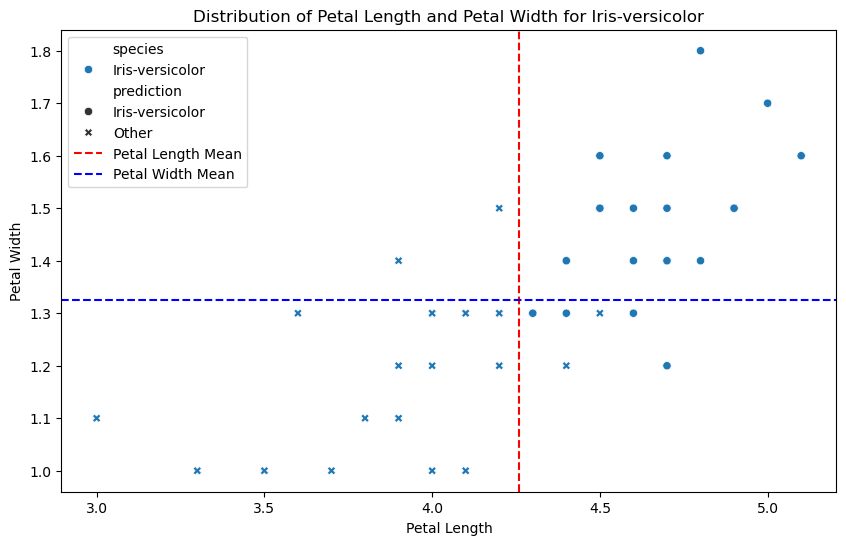

In [43]:
# Exercise 9 - try a different species

import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the iris dataset from the URL
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
iris_data = pd.read_csv(url, header=None, names=['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species'])

# Filter for Iris-versicolor species
versicolor_data = iris_data[iris_data['species'] == 'Iris-versicolor'].copy()

# Calculate means for numeric columns
mean_values = versicolor_data[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']].mean()

# Define decision tree function using mean values
def classify_iris_versicolor_mean(row):
    if row['petal-length'] >= mean_values['petal-length']:
        if row['petal-width'] >= mean_values['petal-width']:
            return 'Iris-versicolor'
        else:
            if row['sepal-length'] >= mean_values['sepal-length']:
                return 'Iris-versicolor'
            else:
                return 'Other'
    else:
        return 'Other'

# Apply the decision tree to the Iris-versicolor dataset
versicolor_data.loc[:, 'prediction'] = versicolor_data.apply(classify_iris_versicolor_mean, axis=1)

# Calculate the proportion of correct predictions
versicolor_data.loc[:, 'correct'] = versicolor_data['prediction'] == versicolor_data['species']
correct_proportion = versicolor_data['correct'].mean()

print(f"Proportion of correct predictions using means: {correct_proportion:.2f}")

# Try different decision-making lines
def classify_iris_versicolor_alternative(row, thresholds):
    if row['petal-length'] >= thresholds['petal-length']:
        return 'Iris-versicolor' if row['petal-width'] >= thresholds['petal-width'] else 'Other'
    else:
        return 'Other'

# Define alternative thresholds for comparison
alternative_thresholds = {
    'petal-length': mean_values['petal-length'] * 0.9,
    'petal-width': mean_values['petal-width'] * 0.9,
    'sepal-length': mean_values['sepal-length'] * 0.9,
    'sepal-width': mean_values['sepal-width'] * 0.9
}

# Apply the alternative decision tree to the Iris-versicolor dataset
versicolor_data.loc[:, 'alternative_prediction'] = versicolor_data.apply(lambda row: classify_iris_versicolor_alternative(row, alternative_thresholds), axis=1)

# Calculate the proportion of correct predictions for the alternative criteria
versicolor_data.loc[:, 'alternative_correct'] = versicolor_data['alternative_prediction'] == versicolor_data['species']
alternative_correct_proportion = versicolor_data['alternative_correct'].mean()

print(f"Proportion of correct predictions using alternative criteria: {alternative_correct_proportion:.2f}")

# Plotting the data for visual inspection
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=versicolor_data, x='petal-length', y='petal-width', hue='species', style='prediction')
plt.axvline(mean_values['petal-length'], color='r', linestyle='--', label='Petal Length Mean')
plt.axhline(mean_values['petal-width'], color='b', linestyle='--', label='Petal Width Mean')
plt.title('Distribution of Petal Length and Petal Width for Iris-versicolor')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()
